#### 가정) 미세먼지에 영향받는 실질적인 유동인구 연령을 구할 수 있을 것이다

In [3]:
import seaborn as sns    
%matplotlib inline  
from matplotlib import font_manager, rc
import pandas as pd

In [1]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [183]:
#데이터 불러옴
flow_data = pd.read_pickle('../../data/local_data/pkls/fppkl/real_move.pickle')
dust_data = pd.read_pickle('../../data/local_data/pkls/dustpkl/gutotal_365.pickle')

In [184]:
# flot_data.columns=['STD_YM', 'STD_YMD', 'HDONG_CD', 'HDONG_NM', 'FLOW_POP_CON_00',
#        'FLOW_POP_CON_10', 'FLOW_POP_CON_20', 'FLOW_POP_CON_30',
#        'FLOW_POP_CON_40', 'FLOW_POP_CON_50', 'FLOW_POP_CON_60',
#        'FLOW_POP_CON_70', 'SUM', 'MEAN', 'SUM-WORKER']
del flow_data['STD_YM']
del flow_data['HDONG_CD']
# del flow_data['STD_YMD']
# del flow_data['HDONG_NM']
flow_data.columns

Index(['STD_YMD', 'HDONG_NM', 'FLOW_POP_CON_00', 'FLOW_POP_CON_10',
       'FLOW_POP_CON_20', 'FLOW_POP_CON_30', 'FLOW_POP_CON_40',
       'FLOW_POP_CON_50', 'FLOW_POP_CON_60', 'FLOW_POP_CON_70', 'SUM', 'MEAN',
       'SUM-WORKER'],
      dtype='object')

In [185]:
dust_data.dtypes
# dust_data['date'] = dust_data['date'].astype('float64')
dust_data.date=pd.to_datetime(dust_data.date,format='%Y%m%d')
#날짜별로 동 다 합쳐버리자

In [186]:
dust_data.date

0      2018-04-01
1      2018-04-02
2      2018-04-03
3      2018-04-04
4      2018-04-05
5      2018-04-06
6      2018-04-07
7      2018-04-08
8      2018-04-09
9      2018-04-10
10     2018-04-11
11     2018-04-12
12     2018-04-13
13     2018-04-14
14     2018-04-15
15     2018-04-16
16     2018-04-17
17     2018-04-18
18     2018-04-19
19     2018-04-20
20     2018-04-21
21     2018-04-22
22     2018-04-23
23     2018-04-24
24     2018-04-25
25     2018-04-26
26     2018-04-27
27     2018-04-28
28     2018-04-29
29     2018-04-30
          ...    
5445   2019-03-02
5446   2019-03-03
5447   2019-03-04
5448   2019-03-05
5449   2019-03-06
5450   2019-03-07
5451   2019-03-08
5452   2019-03-09
5453   2019-03-10
5454   2019-03-11
5455   2019-03-12
5456   2019-03-13
5457   2019-03-14
5458   2019-03-15
5459   2019-03-16
5460   2019-03-17
5461   2019-03-18
5462   2019-03-19
5463   2019-03-20
5464   2019-03-21
5465   2019-03-22
5466   2019-03-23
5467   2019-03-24
5468   2019-03-25
5469   201

In [187]:
flow_data.STD_YMD=pd.to_datetime(flow_data.STD_YMD,format='%Y%m%d')

In [188]:
# flow_data['STD_YMD'] = pd.to_datetime(flow_data['STD_YMD'], format='%Y%m%d', errors='ignore')

In [189]:
dust_data.columns=['HDONG_NM', 'date', 'pm10', 'pm25', 'msg', 'pm10_class', 'pm25_class',
       'pm_class', 'pm_class_info', 'msg_yes']
# del dust_data ['HDONG_NM']
# del dust_data['date']

In [190]:
mean_flow_data=flow_data.groupby(['STD_YMD']).mean()
#del flow_data['HDONG_CD']
mean_flow_data

,FLOW_POP_CON_00,FLOW_POP_CON_10,FLOW_POP_CON_20,FLOW_POP_CON_30,FLOW_POP_CON_40,FLOW_POP_CON_50,FLOW_POP_CON_60,FLOW_POP_CON_70,SUM,MEAN,SUM-WORKER
STD_YMD,,,,,,,,,,,
2018-04-01,392.612500,4951.304444,12128.261111,13629.992778,15144.990000,15473.123333,11149.277500,4621.792222,77491.353889,4843.209618,77491.353889
2018-04-02,202.250556,5118.468056,16843.069444,19352.061111,22155.390000,20470.976111,14171.582222,6177.334167,104491.131667,6530.695729,93638.672937
2018-04-03,194.233889,5282.998056,17093.723611,20125.809722,23206.536111,21406.519167,14866.327500,6291.169167,108467.317222,6779.207326,97614.858493
2018-04-04,215.112500,5570.279722,17102.179722,20280.486667,23049.118333,21078.545000,14450.025278,6019.618611,107765.365833,6735.335365,96912.907104
2018-04-05,192.871111,5237.302222,16496.902778,19696.313889,22505.716389,20309.937222,13746.743333,5501.734444,103687.521389,6480.470087,92835.062659
2018-04-06,231.876667,5651.045278,16343.969444,19627.870556,22194.683611,20300.125833,13942.432778,5866.304722,104158.308889,6509.894306,93305.850159
2018-04-07,470.507500,5540.907778,15403.416667,17989.555000,19604.605278,19334.734722,13687.804444,5583.221111,97614.752500,6100.922031,97614.752500
2018-04-08,388.886667,4477.963611,11510.528611,13157.536944,14632.780000,15027.436944,10939.034722,4528.313333,74662.480833,4666.405052,74662.480833
2018-04-09,196.509444,4996.715278,16521.024444,19292.751111,21982.454444,20277.721944,14110.835000,6093.795833,103471.807500,6466.987969,92619.348771


In [191]:
dust_data['msg'] = dust_data['msg'].astype('float64')
dust_data['msg_yes'] = dust_data['msg_yes'].astype('float64')
dust_data['pm10_class'] = dust_data['pm10_class'].astype('float64')
dust_data['pm25_class'] = dust_data['pm25_class'].astype('float64')
dust_data['pm_class'] = dust_data['pm_class'].astype('float64')

In [195]:
mean_dust_data=dust_data.groupby(['date']).mean()
mean_dust_data.reset_index(inplace=True)

In [196]:
mean_dust_data.dtypes

date          datetime64[ns]
pm10                 float64
pm25                 float64
msg                  float64
pm10_class           float64
pm25_class           float64
pm_class             float64
msg_yes              float64
dtype: object

In [197]:
flow_dust=pd.merge(mean_dust_data, mean_flow_data,left_on=(['date']),right_on=(['STD_YMD']))

In [198]:
flow_dust

,date,pm10,pm25,msg,pm10_class,pm25_class,pm_class,msg_yes,FLOW_POP_CON_00,FLOW_POP_CON_10,FLOW_POP_CON_20,FLOW_POP_CON_30,FLOW_POP_CON_40,FLOW_POP_CON_50,FLOW_POP_CON_60,FLOW_POP_CON_70,SUM,MEAN,SUM-WORKER
0,2018-04-01,85.785714,49.371429,0.000000,1.642857,1.857143,1.857143,0.000000,392.612500,4951.304444,12128.261111,13629.992778,15144.990000,15473.123333,11149.277500,4621.792222,77491.353889,4843.209618,77491.353889
1,2018-04-02,85.296429,36.535714,0.000000,1.500000,1.464286,1.571429,0.000000,202.250556,5118.468056,16843.069444,19352.061111,22155.390000,20470.976111,14171.582222,6177.334167,104491.131667,6530.695729,93638.672937
2,2018-04-03,91.407143,38.828571,0.000000,1.857143,1.714286,1.928571,0.000000,194.233889,5282.998056,17093.723611,20125.809722,23206.536111,21406.519167,14866.327500,6291.169167,108467.317222,6779.207326,97614.858493
3,2018-04-04,22.482143,11.917857,0.000000,0.107143,0.142857,0.178571,0.000000,215.112500,5570.279722,17102.179722,20280.486667,23049.118333,21078.545000,14450.025278,6019.618611,107765.365833,6735.335365,96912.907104
4,2018-04-05,26.078571,12.260714,0.000000,0.250000,0.178571,0.392857,0.000000,192.871111,5237.302222,16496.902778,19696.313889,22505.716389,20309.937222,13746.743333,5501.734444,103687.521389,6480.470087,92835.062659
5,2018-04-06,213.596429,66.875000,1.000000,2.964286,2.285714,3.000000,0.000000,231.876667,5651.045278,16343.969444,19627.870556,22194.683611,20300.125833,13942.432778,5866.304722,104158.308889,6509.894306,93305.850159
6,2018-04-07,72.725000,36.832143,0.535714,1.178571,1.357143,1.428571,1.000000,470.507500,5540.907778,15403.416667,17989.555000,19604.605278,19334.734722,13687.804444,5583.221111,97614.752500,6100.922031,97614.752500
7,2018-04-08,48.546429,25.471429,0.535714,1.000000,1.035714,1.035714,0.535714,388.886667,4477.963611,11510.528611,13157.536944,14632.780000,15027.436944,10939.034722,4528.313333,74662.480833,4666.405052,74662.480833
8,2018-04-09,72.521429,47.371429,0.535714,1.178571,2.000000,2.000000,0.535714,196.509444,4996.715278,16521.024444,19292.751111,21982.454444,20277.721944,14110.835000,6093.795833,103471.807500,6466.987969,92619.348771
9,2018-04-10,84.853571,41.567857,0.000000,1.428571,1.785714,1.785714,0.535714,207.760833,5166.966944,16956.648056,20123.401667,23109.678889,21337.116944,14850.675556,6429.747778,108181.996667,6761.374792,97329.537937


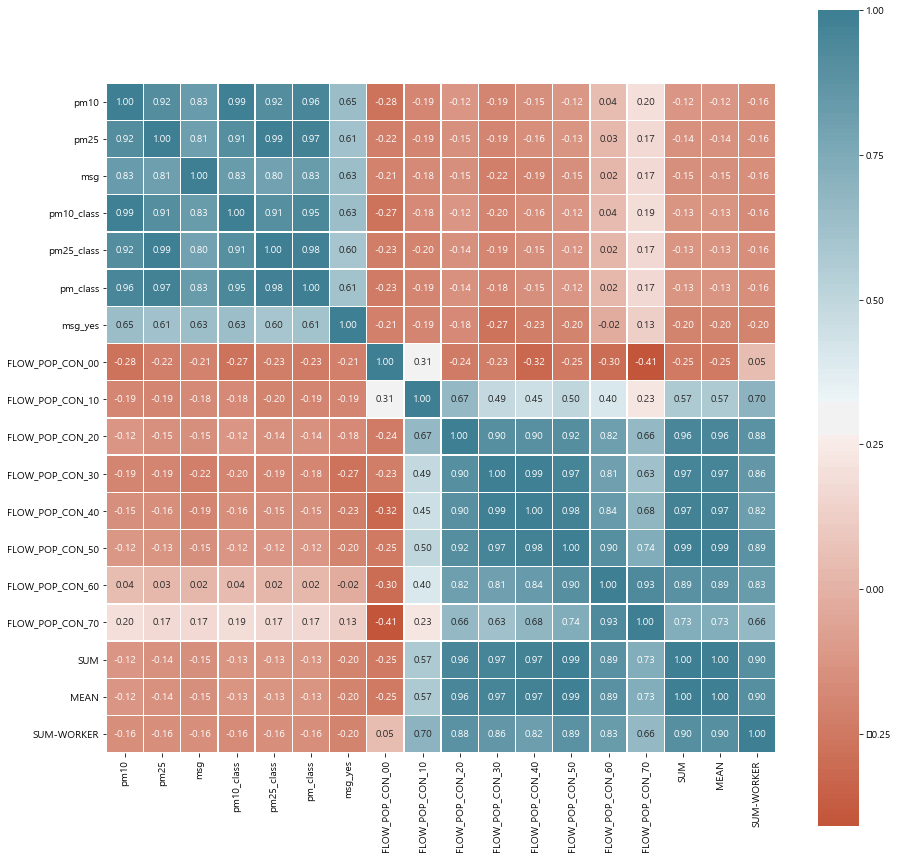

In [201]:
import matplotlib.pylab as plt
plt.figure(figsize=(15,15))
sns.heatmap(data = flow_dust.corr(method = 'spearman'), annot=True, 
fmt = '.2f', linewidths=.5, cmap=sns.diverging_palette(20, 220, n=200),square=True)

#### 1. 전반적으로 미세먼지의 나이대별 유동인구의 상관도는 낮은 음의 상관관계를 보인다.
#### 2. 0~10대의 낮은 연령대는 미세먼지에 상대적으로 높은 음의 상관관계로 보인다.
#### 3. 70세 이상의 연령대는 미세하지만 양의 상관관계를 보이는 특이한 현상이 관측된다.

#### -->3번에 대한 근거 https://www.msn.com/ko-kr/news/national/%EB%8B%A8%EB%8F%85%E2%80%9C%EB%AF%B8%EC%84%B8%EB%A8%BC%EC%A7%80%EB%8A%94-%EB%B0%A9%EC%B6%A9%EB%A7%9D-%EB%AA%BB-%EB%9A%AB%EB%8A%94%EB%8B%A4%E2%80%9D%EB%8A%94-%EC%95%84%EC%9D%B4%EB%93%A4%E2%80%A6%EC%B7%A8%EC%95%BD%EA%B3%84%EC%B8%B5%EC%9D%80-%EC%A0%95%EB%B3%B4%EB%8F%84-%EB%B6%80%EC%A1%B1/ar-BBUvxkA